In [56]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

filename = []
for file in os.listdir('cg_project_files'):
    filename.append(file)
    

In [47]:
FileNameTCGAidTable = pd.read_csv('TCGAid.csv')

k = FileNameTCGAidTable[['file_name']]
columna = k.applymap(lambda x: x[:x.rfind(".gz")])
FileNameTCGAidTable = FileNameTCGAidTable.drop(u'file_name',axis=1)
t2 = pd.concat([FileNameTCGAidTable, columna], axis=1, join="inner")
file_frame = pd.DataFrame(filename)
file_frame.columns = ["file_name"]

table2 = pd.merge(t2, file_frame,on='file_name', how='inner')

table2 = table2.drop('file_name', 1)  # 691 rows × 2 columns , consists of TCGA id's and Tumor_type

tcga_names = table2[['TCGA_ID']]   #tcga_names.TCGA_ID[0] = 'TCGA-28-5213'

In [3]:

patients= []
df = []
frames =[]
for n in range(len(filename)):
    patient = pd.read_csv('cg_project_files/'"{}".format(filename[n]), sep='\t', header = None)
    patients.append(patient)
    patients[n].columns = ["Ensemble_gene", "{}".format(tcga_names.TCGA_ID[n])]
    patients[n] = patients[n].drop('Ensemble_gene', 1)

frame = pd.concat(patients, axis=1, join="inner")

patient1 =pd.read_csv('cg_project_files/000f9b51-4747-4d7f-9ecc-25bef9b25ad7.FPKM-UQ.txt',sep='\t', header = None)
patient1.columns = ["Ensemble_gene", "Gene_expression"]
Ensemble_gene = patient1["Ensemble_gene"]
frames_addcol = pd.concat([Ensemble_gene,frame], axis=1, join="inner")


In [4]:
GeneID = pd.read_csv('EnsembltoGeneID.txt',sep='\t')
GeneID.columns = ["Ensemble_gene", "HGNC_symbol"]

In [5]:
EnsembleID = GeneID[['Ensemble_gene']]

In [6]:
# Removing the decimals from the Ensemble_gene names
y = frames_addcol[['Ensemble_gene']]
column = y.applymap(lambda x: x[:x.rfind(".")])

In [7]:
#Creating the dataframe

dataframe = pd.concat([column,frame], axis=1, join="inner")

#Merging EnsembleToGeneID dataframe with above dataframe for HGSV symbols

table1 = pd.merge(EnsembleID, dataframe,on='Ensemble_gene', how='inner')  #57303 rows x 692 cols

In [8]:
Table_T = table1.T

In [9]:
Table_T.columns = Table_T.iloc[0]

In [10]:
Table_T = Table_T.iloc[1:]

In [11]:
Table_T.reset_index(level=0, inplace=True)

In [12]:
Table_T.rename(columns={'index': 'TCGA_ID'}, inplace=True)

In [13]:
Table_T.columns.names = ['']   # Table_T is 691 rows × 57304 columns

In [14]:
annotationtable = pd.read_csv('annotatetable.csv')

In [15]:
df = pd.merge(Table_T, table2,on='TCGA_ID', how='inner')

In [16]:
df = pd.merge(df, annotationtable,on='TCGA_ID', how='inner')

In [17]:
df.rename(columns={'Pan-Glioma DNA Methylation Cluster': 'Methylation_Cluster', 'Age (years at diagnosis)': 'Age_of_diagnosis'}, inplace=True)

In [18]:
df

,TCGA_ID,ENSG00000279195,ENSG00000202250,ENSG00000202250,ENSG00000281402,ENSG00000210049,ENSG00000211459,ENSG00000210077,ENSG00000210082,ENSG00000209082,...,ENSG00000249520,ENSG00000254760,ENSG00000142512,ENSG00000254428,ENSG00000269181,Tumor_type,Study,Grade,Age_of_diagnosis,Methylation_Cluster
0,TCGA-28-5213,0,0,0,0,59870.4,4.7142e+07,16801.6,1.42824e+08,123660,...,0,785.439,57538.6,20688.7,0,Primary Tumor,Glioblastoma multiforme,G4,72.0,LGm5
1,TCGA-S9-A6U5,0,0,0,0,130693,1.03057e+08,24014.5,2.70916e+08,61861.4,...,0,0,46723.2,0,1218.38,Primary Tumor,Brain Lower Grade Glioma,G2,33.0,LGm2
2,TCGA-E1-5311,0,0,0,0,61482,3.61369e+07,7029.35,1.85351e+08,90538,...,0,9858.23,191127,21330,0,Primary Tumor,Brain Lower Grade Glioma,G3,31.0,LGm3
3,TCGA-S9-A7IS,0,0,0,0,41246.8,3.29306e+07,5305.3,8.98927e+07,9761.75,...,0,18600.9,287302,56694.7,1345.83,Primary Tumor,Brain Lower Grade Glioma,G3,33.0,LGm1
4,TCGA-HT-7694,0,0,0,0,66575.9,1.00625e+08,0,2.92402e+08,42016.8,...,0,26687.5,340735,11046.5,3861.84,Primary Tumor,Brain Lower Grade Glioma,G3,60.0,LGm3
5,TCGA-CS-4938,0,0,0,0,0,7.50233e+06,0,3.38951e+07,0,...,0,11835.3,187271,9649.3,0,Primary Tumor,Brain Lower Grade Glioma,G2,31.0,LGm2
6,TCGA-S9-A7IQ,0,0,0,0,674864,2.33767e+08,27055.5,6.93065e+08,215723,...,0,5059.17,95030.1,15467.7,0,Primary Tumor,Brain Lower Grade Glioma,G2,45.0,LGm2
7,TCGA-QH-A65S,0,0,0,0,312989,9.49808e+07,110874,3.13855e+08,369156,...,0,5923.56,70336.4,17413.9,1339.33,Primary Tumor,Brain Lower Grade Glioma,G2,32.0,LGm1
8,TCGA-P5-A735,0,0,0,0,320652,1.33892e+08,80930.3,3.3429e+08,343643,...,0,5238.45,60795.8,32853,1579.24,Primary Tumor,Brain Lower Grade Glioma,NaN,NaN,LGm2
9,TCGA-19-2619,0,0,0,0,25050.3,3.09951e+07,0,8.50845e+07,15809.5,...,0,4819.97,111231,9068.54,0,Primary Tumor,Glioblastoma multiforme,G4,55.0,LGm5


# PART A

Part A;
Annotate samples by disease status. Both data sets have normal and tumor samples.  
For each gene you need to compare two groups (normal, tumor) with t-test and generate a p-value. Then you will order genes in increasing order of p-values and report top 20 genes you find. 
Do this for the two data sets independently and compare the two lists you find. 
As you compare normal and tumor samples for this part; in your report, this should be the main theme. Genes you find might give insights on molecular reasons behind glioma occurrence.


In [27]:
df["Tumor_type"].describe()

count               744
unique                2
top       Primary Tumor
freq                684
Name: Tumor_type, dtype: object

In [19]:
tumor_GBM = df.loc[(df.Tumor_type == 'Primary Tumor') & (df.Study == 'Glioblastoma multiforme')]  # 165
tumor_GBM = (tumor_GBM[tumor_GBM.columns[1:57304]])


In [20]:
tumor_LGG = df.loc[(df.Tumor_type == 'Primary Tumor') & (df.Study == 'Brain Lower Grade Glioma')]  #519
tumor_LGG = (tumor_LGG[tumor_LGG.columns[1:57304]])


In [21]:
normal_GBM = df.loc[(df.Tumor_type == 'Recurrent Tumor') & (df.Study == 'Glioblastoma multiforme')]  #20
normal_GBM = (normal_GBM[normal_GBM.columns[1:57304]])

In [22]:
normal_LGG = df.loc[(df.Tumor_type == 'Recurrent Tumor') & (df.Study == 'Brain Lower Grade Glioma')] #40
normal_LGG = (normal_LGG[normal_LGG.columns[1:57304]])

In [24]:
#Top 20 significant GBM genes 


from scipy import stats
import numpy as np
pvalue = []
gene = []
tab = []
tscore = []
for n in range(len(normal_GBM.columns)):  
    try:
        
        gene2, [t2, p2] = normal_GBM.columns[n], stats.ttest_ind(normal_GBM[normal_GBM.columns[n]],tumor_GBM[tumor_GBM.columns[n]], equal_var=False)
        pvalue.append(p2)
        tscore.append(t2)
        gene.append(gene2)
        
    
    except:
        ZeroDivisionError 
        
top_20_GBM = pd.DataFrame(np.column_stack([gene, tscore, pvalue]), columns=['Gene', 'T-Score', 'P-value'])
top_20_GBM = top_20_GBM.sort_values(by=['P-value'])

        

In [25]:
#Top 20 significant LGG genes 


from scipy import stats
import numpy as np
pvalue = []
gene = []
tab = []
tscore = []
for n in range(len(normal_LGG.columns)): 
    try:
        
        gene1, [t1, p1] = normal_LGG.columns[n], stats.ttest_ind(normal_LGG[normal_LGG.columns[n]],tumor_LGG[tumor_LGG.columns[n]], equal_var=False)
        pvalue.append(p1)
        tscore.append(t1)
        gene.append(gene1)
        
    
    except:
        ZeroDivisionError 
        
top_20_LGG = pd.DataFrame(np.column_stack([gene, tscore, pvalue]), columns=['Gene', 'T-Score', 'P-value'])
top_20_LGG = top_20_LGG.sort_values(by=['P-value'])


In [26]:
top_20_GBM.head(20)

,Gene,T-Score,P-value
40780,ENSG00000167459,-3.9864941536892817,0.00010074430954873844
44496,ENSG00000232730,-3.9797584372507506,0.00010338143768767205
38731,ENSG00000274353,-4.065687451118362,0.00010364358775640779
40851,ENSG00000234622,-4.100742399580092,0.00010489930768341741
31425,ENSG00000258225,-4.142820763946061,0.00010535299614236258
1845,ENSG00000215938,-3.9744318164397785,0.00010551330474025822
358,ENSG00000252590,-3.973181317211398,0.0001060198239768573
48253,ENSG00000232230,-3.969863973291483,0.00010737476884820676
51561,ENSG00000258743,-3.954212054809493,0.00010965106841958144
2987,ENSG00000273804,-3.963822643325174,0.00010988476801898797


In [27]:
top_20_LGG.head(20)

,Gene,T-Score,P-value
25222,ENSG00000206726,-3.920374189943714,0.00010029409484940663
24770,ENSG00000218813,-3.9159363505516427,0.00010210284160130009
1022,ENSG00000252848,-3.9128579424811223,0.00010337561152366893
52016,ENSG00000229486,-3.912656073183661,0.00010345959705773733
24437,ENSG00000146555,-4.11052172779428,0.00010350795088073287
29798,ENSG00000277893,-3.91013171152516,0.00010392119569912693
26233,ENSG00000265258,-3.909271703907663,0.00010487728090971388
54562,ENSG00000225118,-3.9082035275392935,0.00010532853492331843
33163,ENSG00000234402,-4.078347286975894,0.00010572244301867368
40708,ENSG00000220125,-3.9069005109424393,0.0001058814859015023


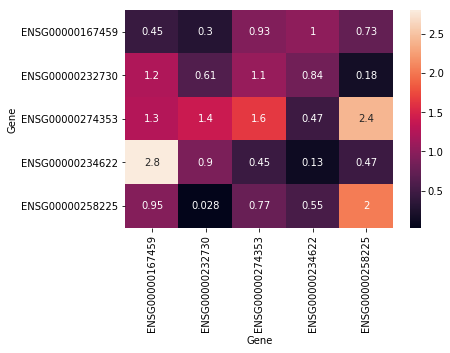

In [55]:
X = top_20_LGG.Gene.head(5)
Y = top_20_GBM.Gene.head(5)

ht_df1 = DataFrame(abs(np.random.randn(5, 5)), index=Y, columns=Y)
sns.heatmap(ht_df1, annot=True)

# PART B


Annotate samples by expression and methylation based clusters. Each cluster would have LGG and GBM samples. Compare LGG and GBM samples within IDH-mut (LGm1-2-3) samples. Then compare LGG and GBM samples within IDH-wt (LGm4-5-6) samples.
For each gene you need to compare two groups with t-test and generate a p-value. Then you will order genes in increasing order of p-values and report top 20 genes you find. 
Finally compare the two lists you find. 
As you compare low grade and high grade gliomas in different glioma subtypes; in your report, this should be the main theme. Genes you find might give insights on molecular reasons behind glioma aggression.


In [28]:
Lgm123_G23 = df.loc[(df.Methylation_Cluster == 'LGm1') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm2') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm3') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm1') & (df.Grade == 'G3') | (df.Methylation_Cluster == 'LGm2') & (df.Grade == 'G3') | (df.Methylation_Cluster == 'LGm3') & (df.Grade == 'G3') ]
Lgm123_G23 = (Lgm123_G23[Lgm123_G23.columns[1:57304]])  #396 rows

In [29]:
Lgm123_G4 = df.loc[(df.Methylation_Cluster == 'LGm1') & (df.Grade == 'G4') | (df.Methylation_Cluster == 'LGm2')  & (df.Grade == 'G4') | (df.Methylation_Cluster == 'LGm3') & (df.Grade == 'G4') ]
Lgm123_G4 = (Lgm123_G4[Lgm123_G4.columns[1:57304]])   # 9 rows

In [30]:
Lgm456_G23 = df.loc[(df.Methylation_Cluster == 'LGm4') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm5') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm6') & (df.Grade == 'G2') | (df.Methylation_Cluster == 'LGm4') & (df.Grade == 'G3') | (df.Methylation_Cluster == 'LGm5') & (df.Grade == 'G3') | (df.Methylation_Cluster == 'LGm6') & (df.Grade == 'G3') ]
Lgm456_G23 = (Lgm456_G23[Lgm456_G23.columns[1:57304]]) #92 rows

In [31]:
Lgm456_G4 = df.loc[(df.Methylation_Cluster == 'LGm4') & (df.Grade == 'G4') | (df.Methylation_Cluster == 'LGm5')  & (df.Grade == 'G4') | (df.Methylation_Cluster == 'LGm6') & (df.Grade == 'G4') ]
Lgm456_G4 = (Lgm456_G4[Lgm456_G4.columns[1:57304]])  #124 rows

In [32]:
# LGm 1-2-3 cluster and G2,G3 Vs G4

from scipy import stats
import numpy as np
pvalue = []
gene = []
tab = []
tscore = []
for n in range(len(Lgm123_G23.columns)):  
    try:
        
        gene2, [t2, p2] = Lgm123_G23.columns[n], stats.ttest_ind(Lgm123_G23[Lgm123_G23.columns[n]],Lgm123_G4[Lgm123_G4.columns[n]], equal_var=False)
        pvalue.append(p2)
        tscore.append(t2)
        gene.append(gene2)
        
    
    except:
        ZeroDivisionError 
        
top_20_Lgm123 = pd.DataFrame(np.column_stack([gene, tscore, pvalue]), columns=['Gene', 'T-Score', 'P-value'])
top_20_Lgm123 = top_20_Lgm123.sort_values(by=['P-value'])

        

In [33]:
# LGm 456 cluster and G2,G3 Vs G4

from scipy import stats
import numpy as np
pvalue = []
gene = []
tab = []
tscore = []
for n in range(len(Lgm456_G23.columns)):  
    try:
        
        gene1, [t1, p1] = Lgm456_G23.columns[n], stats.ttest_ind(Lgm456_G23[Lgm456_G23.columns[n]],Lgm456_G4[Lgm456_G4.columns[n]], equal_var=False)
        pvalue.append(p1)
        tscore.append(t1)
        gene.append(gene1)
        
    
    except:
        ZeroDivisionError 
        
top_20_Lgm456 = pd.DataFrame(np.column_stack([gene, tscore, pvalue]), columns=['Gene', 'T-Score', 'P-value'])
top_20_Lgm456 = top_20_Lgm456.sort_values(by=['P-value'])


In [34]:
top_20_Lgm123.head(20)

,Gene,T-Score,P-value
29817,ENSG00000250611,3.9303218692495134,0.00010014768918798129
31963,ENSG00000237273,5.572273255885974,0.0001002372237709855
27435,ENSG00000272218,3.9298317235020166,0.00010034430839948316
10548,ENSG00000207712,3.928267288726447,0.00010097432237886006
17755,ENSG00000229560,3.9280841093457064,0.00010104833523432753
17918,ENSG00000239568,3.927517741602867,0.00010127749902904962
20912,ENSG00000264032,3.927475241961577,0.00010129471508709191
44296,ENSG00000201931,3.9265641288240585,0.00010166446290504375
21598,ENSG00000150201,4.701959804124525,0.00010171689391749665
11794,ENSG00000207363,3.9257633577723103,0.00010199048721746992


In [35]:
top_20_Lgm456.head(20)

,Gene,T-Score,P-value
16142,ENSG00000105197,-3.877326868233407,0.00014477766735638886
12431,ENSG00000064489,-3.744761688001348,0.0002321955163591485
54576,ENSG00000131409,-3.7313069837466237,0.000244127326156358
43543,ENSG00000273353,3.7439792252810857,0.000272781444488936
5413,ENSG00000239332,3.633669815079832,0.00038939843371086193
25238,ENSG00000178605,-3.5853079470698908,0.00041865991516493243
4570,ENSG00000237360,3.629007272805415,0.00045367816389857234
35046,ENSG00000266953,-3.531386860138245,0.0005078765411323709
351,ENSG00000246477,3.547957426410144,0.0005161736372781466
8565,ENSG00000103343,-3.524035402944627,0.0005202467890327425


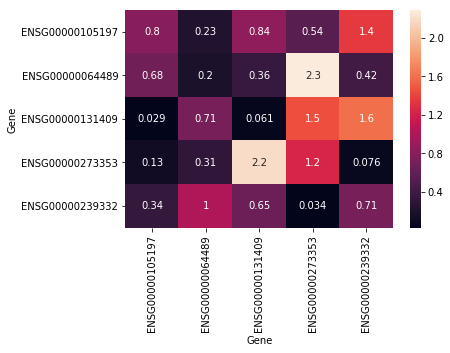

In [54]:
X = top_20_Lgm123.Gene.head(5)
Y = top_20_Lgm456.Gene.head(5)

ht_df2 = DataFrame(abs(np.random.randn(5, 5)), index=Y, columns=Y)
sns.heatmap(ht_df2, annot=True)

# PART C

Annotate samples by expression and methylation based clusters. Each cluster would have LGG and GBM samples. Compare LGG and GBM samples within IDH-mut (LGm1-2-3) samples. Then use regression (https://en.wikipedia.org/wiki/Linear_regression) to find genes that correlate with Patient Age for two subtypes. 
For each gene you, need to run regression (AGE should be explanatory variable and gene should be dependent variable) and generate a p-value. Then you will order genes in increasing order of p-values and report top 20 genes you find. 
Finally compare the two lists you find. 
As you analyze genes that correlate with age in different glioma subtypes; In your report, this should be the main theme. Genes you find might give insights on molecular reasons behind glioma aggression.


In [36]:
Lgm123 = df.loc[(df.Methylation_Cluster == 'LGm1') | (df.Methylation_Cluster == 'LGm2') | (df.Methylation_Cluster == 'LGm3')  ]
Lgm123 = Lgm123.dropna(subset=['Age_of_diagnosis']) #drop nan from dataframe
gene_exp_123 = (Lgm123[Lgm123.columns[1:57304]]) #only retain gene expression columns
gene_exp_123 = gene_exp_123.loc[:, (gene_exp_123 != 0).any(axis=0)] #delete all zero columns

In [37]:
Lgm456 = df.loc[(df.Methylation_Cluster == 'LGm4') | (df.Methylation_Cluster == 'LGm5') | (df.Methylation_Cluster == 'LGm6')  ]
Lgm456 = Lgm456.dropna(subset=['Age_of_diagnosis']) #drop nan from dataframe
gene_exp_456 = (Lgm456[Lgm456.columns[1:57304]]) #only retain gene expression columns
gene_exp_456 = gene_exp_456.loc[:, (gene_exp_456 != 0).any(axis=0)] #delete all zero columns

In [38]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy import stats
pvalue = []
gene_name = []
Y = Lgm123['Age_of_diagnosis']
for n in range(3000):  #len(gene_exp_123.columns)
    X = gene_exp_123[gene_exp_123.columns[n]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(X).astype(np.float),np.array(Y).astype(np.float))
    gene_name.append(gene_exp_123.columns[n])
    pvalue.append(p_value)
    
        
top_20_Reg123 = pd.DataFrame(np.column_stack([gene_name, pvalue]), columns=['Gene', 'P-value'])
top_20_Reg123 = top_20_Reg123.sort_values(by=['P-value'])


In [39]:
# Lgm 456 Linear Regression with Age

p1value = []
gene1_name = []
y = Lgm456['Age_of_diagnosis']
for n in range(3000): #len(gene_exp_456.columns)
    x = gene_exp_456[gene_exp_456.columns[n]]
    slope1, intercept1, r_value1, p1_value, std_err1 = stats.linregress(np.array(x).astype(np.float),np.array(y).astype(np.float))
    gene1_name.append(gene_exp_456.columns[n])
    p1value.append(p1_value)
    
        
top_20_Reg456 = pd.DataFrame(np.column_stack([gene1_name, p1value]), columns=['Gene', 'P-value'])
top_20_Reg456 = top_20_Reg456.sort_values(by=['P-value'])





In [44]:
top_20_Reg123.head(20)

,Gene,P-value
2910,ENSG00000252802,0.00037455580231558793
2635,ENSG00000258952,0.0004114411752171655
2084,ENSG00000252888,0.0007354444644707284
653,ENSG00000251965,0.0007694366752064544
220,ENSG00000279287,0.0008855753621919918
1181,ENSG00000211633,0.0009851679070211347
929,ENSG00000224373,0.0011096376518523695
741,ENSG00000223648,0.0012368433773453811
2117,ENSG00000132464,0.0013169911319062893
1502,ENSG00000207941,0.001512047410961843


In [41]:
top_20_Reg456.head(20)

,Gene,P-value
2663,ENSG00000263372,0.00020285770070710226
1709,ENSG00000274133,0.0005701211289386464
2108,ENSG00000222285,0.0006064956005403635
2610,ENSG00000200887,0.0006114638066312235
2639,ENSG00000259420,0.0006886529356717798
1301,ENSG00000199970,0.0007752723728916339
1832,ENSG00000251937,0.0008510374471546962
2939,ENSG00000265885,0.001368558330497573
112,ENSG00000267665,0.0016366299808310632
240,ENSG00000207076,0.001682768733009763


In [42]:
import matplotlib.pyplot as plt

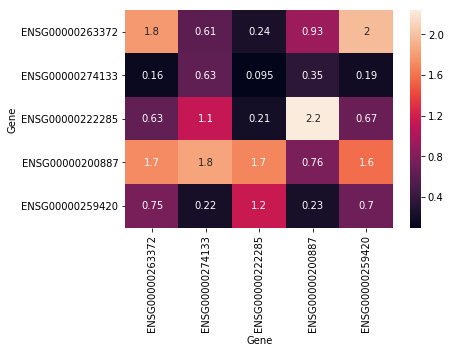

In [53]:

X = top_20_Reg123.Gene.head(5)
Y = top_20_Reg456.Gene.head(5)

ht_df3 = DataFrame(abs(np.random.randn(5, 5)), index=Y, columns=Y)
sns.heatmap(ht_df3, annot=True)